## Question 1 : 

## Kernel Ridge Regression and  Regular Ridge Regression.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import sklearn
sklearn.__version__
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.model_selection import learning_curve

C:\Users\samid\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [11]:
print (boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

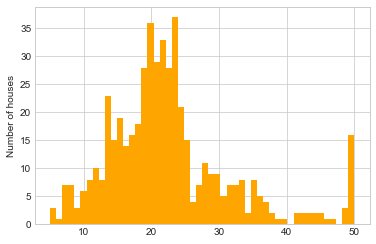

In [7]:
#Plot the dataset with price vs number of houses
plt.hist(boston.target,bins=50, color = 'orange' )
plt.ylabel('Number of houses')
plt.show()

In [12]:
#converting it into dataframe
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


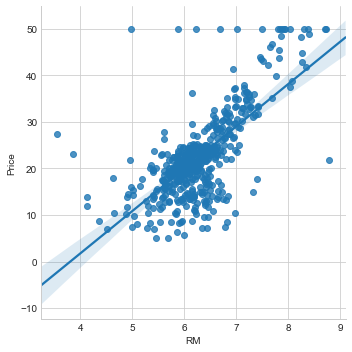

In [13]:
#Scatter plot of average number of rooms per dwelling vs price
boston_df['Price'] = boston.target
sns.lmplot('RM','Price',data=boston_df)
plt.show()

In [14]:
X_multi = boston_df.drop('Price',1)
#drop column "Price" in

#Split into train and test
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X_multi,boston_df.Price)

## KERNAL REGRESSION MODEL

In [15]:
kr =  KernelRidge(alpha=1.0)
kr.fit(X_train, y_train)

KernelRidge(alpha=1.0, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None)

In [16]:
#pred_kernel_ridge = lreg.predict(X_test)
pred_kr_train = kr.predict(X_train)
mse_kr_train= np.mean((y_train-pred_kr_train)**2)
print ("Mean of error of train for Kernal Regression",mse_kr_train)

Mean of error of train for Kernal Regression 24.201194663459923


In [22]:
pred_kr_test = kr.predict(X_test)
mse_kr_test = np.mean((y_test-pred_kr_test)**2)
print ("Mean squared error of test for Kernal Regression %.2f" % mse_kr_test)

Mean squared error of test for Kernal Regression 25.75


In [18]:
#Calculate and print score
print("The score for Kernal Regression : %.5f" %kr.score(X_test,y_test))

The score for Kernal Regression : 0.48185


## RIDGE REGRESSION MODEL

In [38]:
#Ridge Regression
#import ridge library
from sklearn.linear_model import Ridge
## training the model
ridgeReg = Ridge(alpha=1, normalize=True)

In [39]:
#Fit the model
ridgeReg.fit(X_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
   random_state=None, solver='auto', tol=0.001)

In [40]:
# Predict ridge regression on test
pred_ridge_test = ridgeReg.predict(X_test)
##calculating mse
mse_ridge = np.mean((pred_ridge_test - y_test)**2)
print ("Mean squared error of test for Ridge Regression %.2f" %mse_ridge)

Mean squared error of test for Ridge Regression 21.05


In [41]:
## calculating score
print("The score for Ridge Regression %.5f" %ridgeReg.score(X_test,y_test))

The score for Ridge Regression 0.57652


### Conclusion:

### The Ridge Regression gives a 58% fit whereas a Kernel Ridge Regression gives a 48% fit.

### We can conclude that the Ridge Regression performs better in this case

# Question 2:

# Linear, Polynomial and RBF kernels in SVM

#### This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

#### The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [2]:
# Loading a new Data Set
df = pd.read_csv('C:/Users/samid/Desktop/course/ML & Stat/diabetes.csv')

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


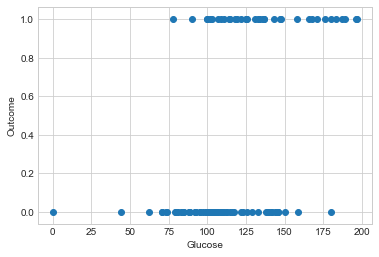

In [16]:
# Scatter plot of GLucose vs Outcome
plt.scatter(df.Glucose,df.Outcome)
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.show()

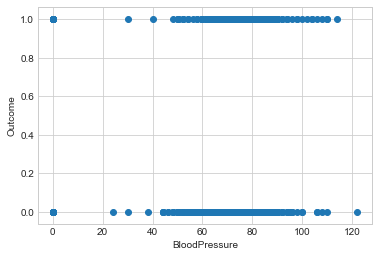

In [13]:
# Scatter plot of GLucose vs Outcome
plt.scatter(df.BloodPressure,df.Outcome)
plt.xlabel('BloodPressure')
plt.ylabel('Outcome')
plt.show()

In [3]:
#Loading as predictors & Response
x = np.array(df.ix[:, 1:3]) # Using Columns Glucose and Blood Pressure
y = np.array(df['Outcome'])  # reponse

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state = 42)

## LINEAR KERNEL SVM

In [4]:
#Linear Kernel
lin = svm.SVC(kernel='linear', C=10,gamma='auto').fit(X_train, y_train)

#Calculate prediction accuracy
pred_linear_test = lin.predict(X_test)
mse_linear_test = np.mean((y_test-pred_linear_test)**2)
print ("Mean squared error of test for Linear Regression %.2f" % mse_linear_test)

#Calculate and print score
print("The score for Linear Regression : %.5f" %lin.score(X_test,y_test))


Mean squared error of test for Kernal Regression 0.30
The score for Kernal Regression : 0.69697


## POLYNOMIAL KERNEL SVM

In [5]:
#POlynomial Kernel
poly = svm.SVC(kernel='poly')
poly.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
#Calculate prediction accuracy
pred_poly_test = poly.predict(X_test)
mse_poly_test = np.mean((y_test-pred_poly_test)**2)
print ("Mean squared error of test for Polynomial Regression %.2f" % mse_poly_test)

#Calculate and print score
print("The score for Polynomial Regression : %.5f" %poly.score(X_test,y_test))

Mean squared error of test for Polynomial Regression 0.30
The score for Polynomial Regression : 0.69697


## RBF KERNEL SVM

In [7]:
#RBF Kernel
rbf = svm.SVC(kernel='rbf')
rbf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
#Calculate prediction accuracy
pred_rbf_test = rbf.predict(X_test)
mse_rbf_test = np.mean((y_test-pred_rbf_test)**2)
print ("Mean squared error of test for Kernal Regression %.2f" % mse_rbf_test)

#Calculate and print score
print("The score for Kernal Regression : %.5f" %rbf.score(X_test,y_test))

Mean squared error of test for Kernal Regression 0.42
The score for Kernal Regression : 0.69697


In [10]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap

xx, yy = np.meshgrid(np.arange(start = X_train[:, 0].min() - 1, stop = X_train[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_train[:, 1].min() - 1, stop = X_train[:, 1].max() + 1, step = 0.01))


In [11]:
plt.contourf(xx, yy, lin.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


(-1.0, 110.99000000000009)

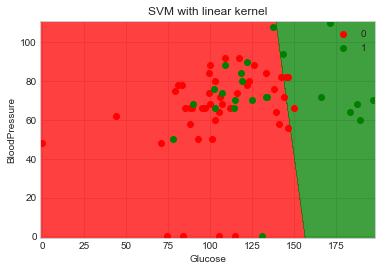

In [12]:
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
    
plt.title('SVM with linear kernel')
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.legend()
plt.show()

In [13]:
plt.contourf(xx, yy, poly.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
    
plt.title('SVM with linear kernel')
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.legend()
plt.show()

MemoryError: 

### Reference:
#### 1. https://www.kaggle.com/uciml/pima-indians-diabetes-database
#### 2. https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code
#### 3. http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
#### 4. http://scikit-learn.org/stable/modules/linear_model.html
#### 5. http://scikit-learn.org/stable/modules/svm.html
#### 6. http://scikit-learn.org/stable/modules/svm.html